<a href="https://colab.research.google.com/github/NoelleI/Udacity-Deployment/blob/master/Heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:


'''Step 1 Detect Skin 
this code was adapted from https://www.pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
and
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/'''

# import the necessary packages
import imutils
import numpy as np
import argparse
import cv2
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
# construct the argument parse and parse the arguments

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
# if a video path was not supplied, grab the reference
# to the gray


camera = cv2.VideoCapture("IMG_4100.MOV")  
n_frames = int(camera.get(cv2.CAP_PROP_FRAME_COUNT))
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(n_frames)

''''change this'''


ra = []
ga = []
ba = []
box = []

# keep looping over the frames in the video
for i in range(n_frames):
    
    print(i)
	# grab the current frame
    (grabbed, frame) = camera.read()
	# if we are viewing a video and we did not grab a
	# frame, then we have reached the end of the video
	# resize the frame, convert it to the HSV color space,
	# and determine the HSV pixel intensities that fall into
	# the speicifed upper and lower boundaries
    if grabbed:
        frame = imutils.resize(frame, width = 400)
        frame = imutils.rotate(frame, 180)
        converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        skinMask = cv2.inRange(converted, lower, upper)
	# apply a series of erosions and dilations to the mask
	# using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        skinMask = cv2.erode(skinMask, kernel, iterations = 2)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
	# blur the mask to help remove noise, then apply the
	# mask
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        skin = cv2.bitwise_and(frame, frame, mask = skinMask)

        bboxes = classifier.detectMultiScale(skin, 1.05, 8)
        print('len bboxes:', len(bboxes))
        if box == []:  
          if len(bboxes) ==0:
            print("face not detected in first frame")   ##change to an assert later
          else:
            box = bboxes[0]
#choose the box most like the last frame, if more than one box. If zero boxes, use box from last frame
        else:
          if len(bboxes) ==0:
            box = box   
            print("old box used") 
          else:
           test2 = np.zeros(len(bboxes))
           for i, boxnew in enumerate(bboxes):
            [xn, yn, widthn, heightn] = boxnew 
            x2n = xn + widthn
            y2n = yn + heightn
           	# draw a rectangle mask and compare to box from previous frame
            tempn = np.zeros([frame.shape[0], frame.shape[1]])
            tempn = tempn.astype(np.uint8)
            cv2.rectangle(tempn, (xn, yn), (x2n, y2n), (255,255,255), -1)
            test = cv2.bitwise_and(temp, temp, mask = tempn)
            test2[i] = np.mean(test)
           boxt = bboxes[np.argmax(test2)]
           if boxt[3] <= width*0.9 or boxt[3] >= width*1.1:
             box = box
             print("old box used")
           else:
             box = boxt
             print("nearest box used")
	# extract
        [x, y, width, height] = box 
        x2 = x + width
        y2 = y + height
        x2 = int(x2 - 0.2*width)
        x = int(x + 0.2*width)
        #y2 = int(y2 - 0.8*height)
           	# draw a rectangle over the pixels
        temp = np.zeros([frame.shape[0], frame.shape[1]])
        cv2.rectangle(temp, (x, y), (x2, y2), (255,255,255), -1)
        temp = temp/255
        temp = temp.astype(np.uint8)
        skin = cv2.bitwise_and(skin, skin, mask = temp)



        #find the average red, green and blue in the skin
        N = 0
        r=0
        g=0
        b=0
        skinr = skin[:,:,0].reshape(-1)
        sking = skin[:,:,1].reshape(-1)
        skinb = skin[:,:,2].reshape(-1)

        #print(skinMask.shape)
        for i, pixel in enumerate(skinMask.reshape(-1)):
          if  not pixel==0:
            r += skinr[i]
            g += sking[i]
            b += skinb[i]
            N+=1
        ra += [r/N] 
        ga += [g/N]
        ba += [b/N]




	# show the skin in the image along with the mask
      
        #cv2_imshow(np.vstack([frame, skin]))
# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

2273
0
len bboxes: 1
1
len bboxes: 1
nearest box used


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Streaming output truncated to the last 5000 lines.
len bboxes: 1
nearest box used
606
len bboxes: 1
nearest box used
607
len bboxes: 1
nearest box used
608
len bboxes: 1
nearest box used
609
len bboxes: 1
old box used
610
len bboxes: 1
old box used
611
len bboxes: 1
old box used
612
len bboxes: 1
nearest box used
613
len bboxes: 1
nearest box used
614
len bboxes: 0
old box used
615
len bboxes: 1
nearest box used
616
len bboxes: 0
old box used
617
len bboxes: 0
old box used
618
len bboxes: 0
old box used
619
len bboxes: 1
nearest box used
620
len bboxes: 0
old box used
621
len bboxes: 0
old box used
622
len bboxes: 0
old box used
623
len bboxes: 0
old box used
624
len bboxes: 0
old box used
625
len bboxes: 0
old box used
626
len bboxes: 0
old box used
627
len bboxes: 0
old box used
628
len bboxes: 0
old box used
629
len bboxes: 0
old box used
630
len bboxes: 1
old box used
631
len bboxes: 1
nearest box used
632
len bboxes: 0
old box used
633
len bboxes: 1
nearest box used
634
len bboxes

In [169]:
ra = np.array(ra)

In [170]:
np.argmin(ra)

557

In [171]:
ra[np.argmin(ra)]

25.572328046544992

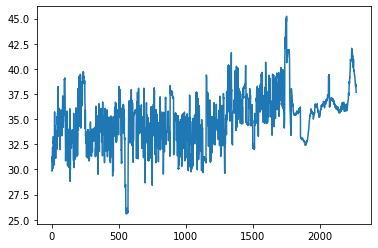

In [172]:
import matplotlib.pyplot as plt

plt.plot(ra)

In [173]:
ga = np.array(ga)
ba = np.array(ba)

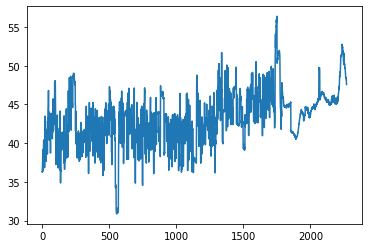

In [174]:
plt.plot(ga)

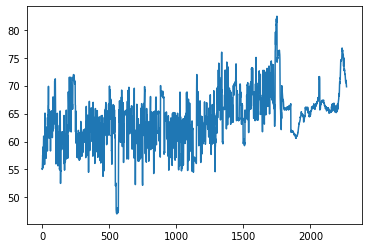

In [175]:
plt.plot(ba)

In [176]:
from sklearn.decomposition import FastICA
from scipy import signal
transformer = FastICA(n_components=3)

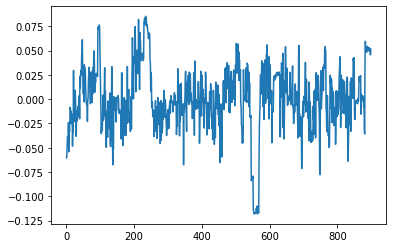

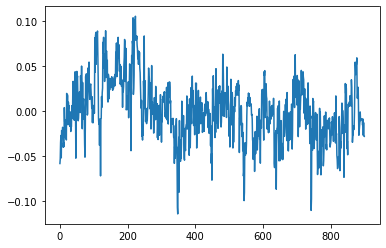

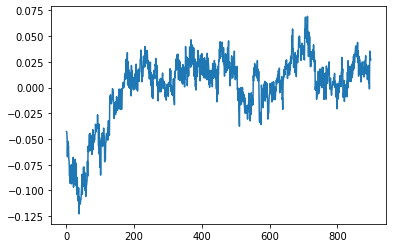

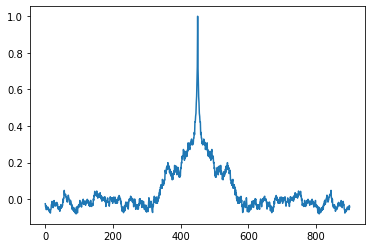

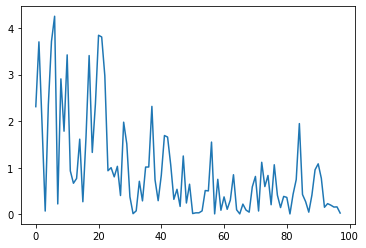

4.251264469253309 3.8434868423234048
waiting


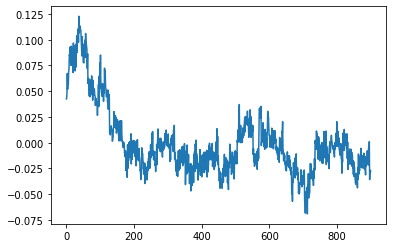

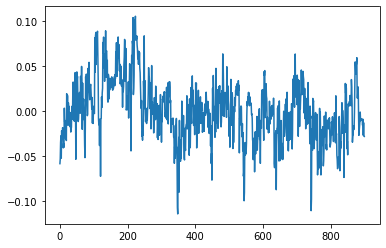

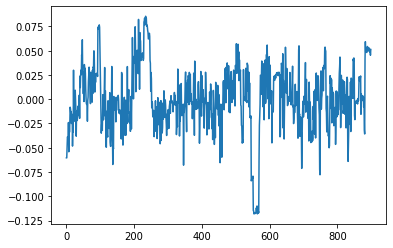

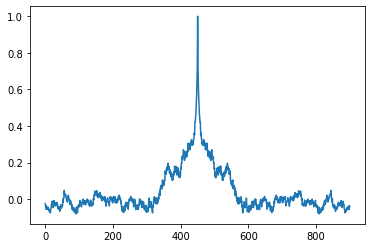

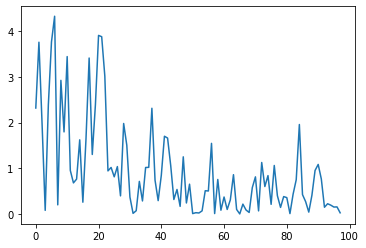

4.321923366021184 3.9039196538945755
waiting


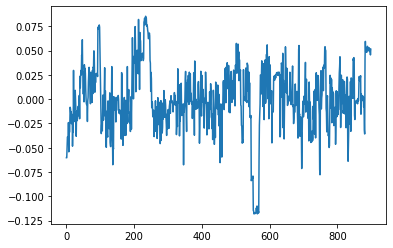

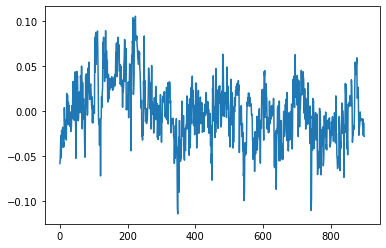

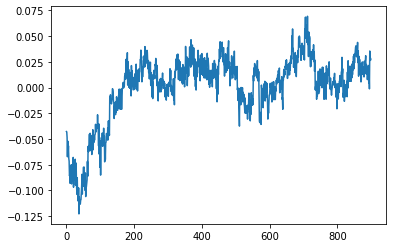

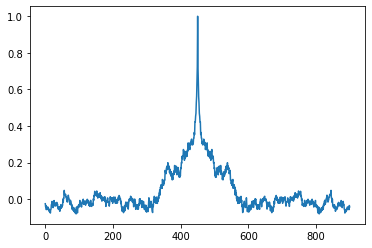

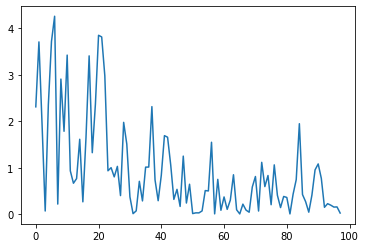

4.259776464152713 3.8506752229338232
waiting


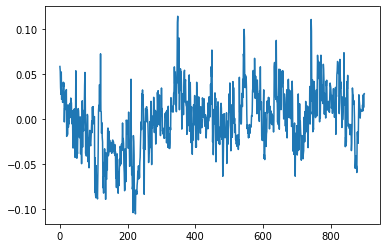

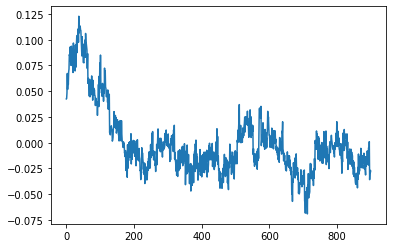

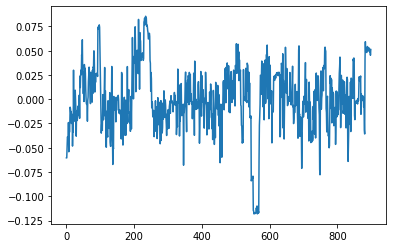

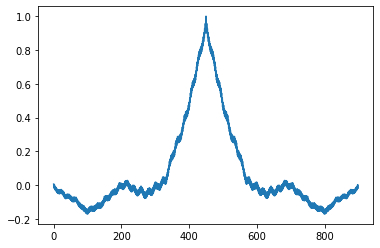

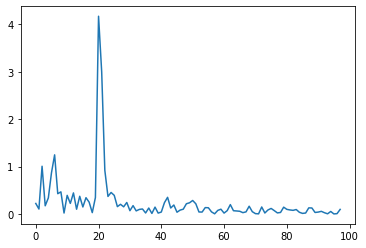

4.173442446107668 1.2482868642111677
estimated heartrate  84.0


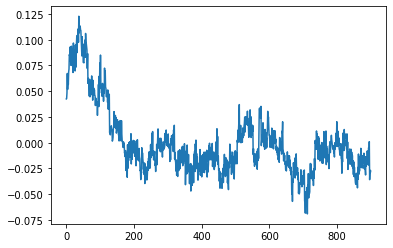

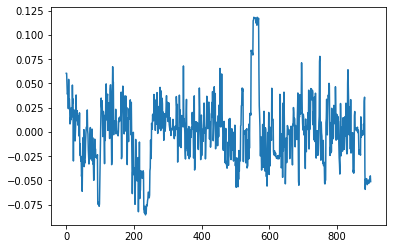

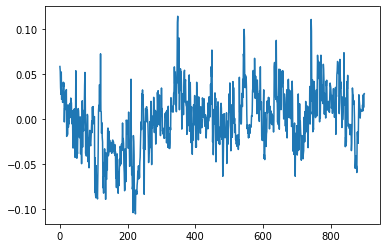

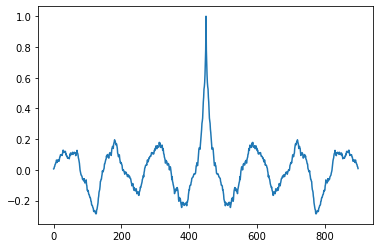

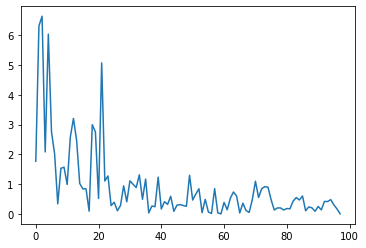

6.6279009716019575 5.063927271508255
waiting


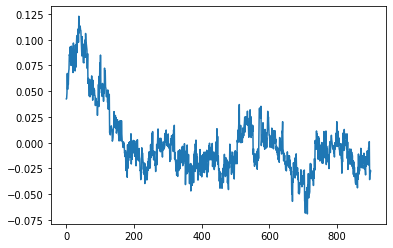

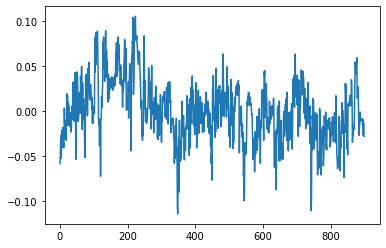

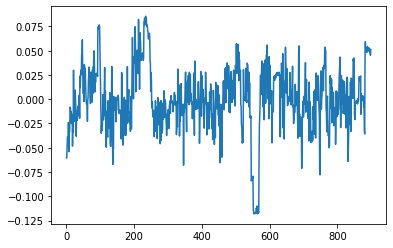

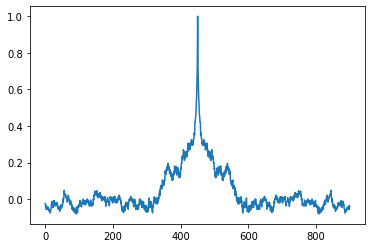

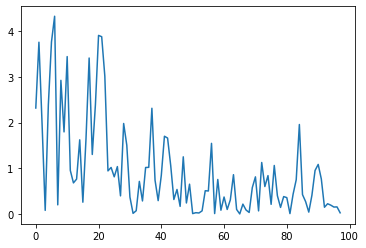

4.321692409633962 3.9037277194934177
waiting


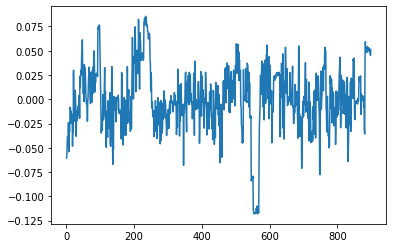

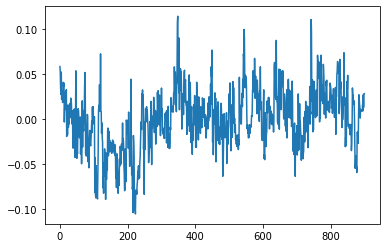

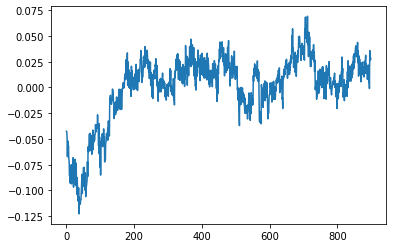

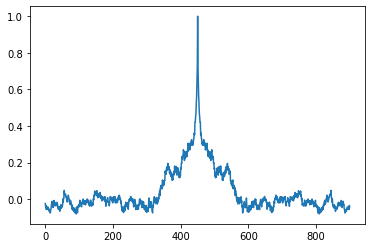

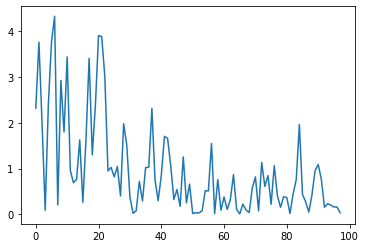

4.3299328057658 3.9071737067234165
waiting


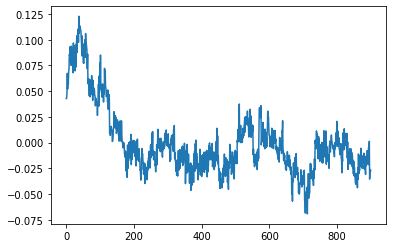

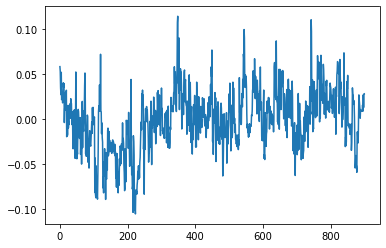

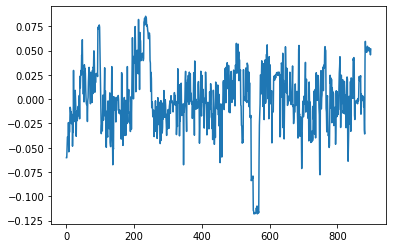

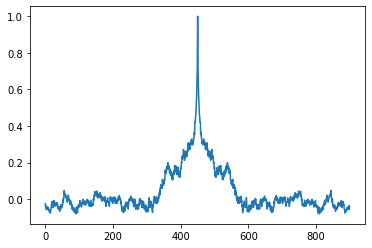

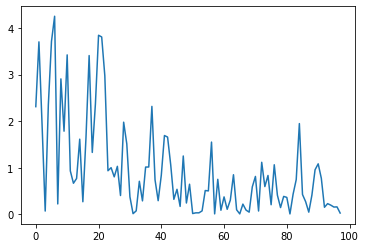

4.251409649899784 3.843636362819764
waiting


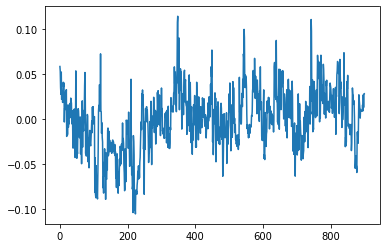

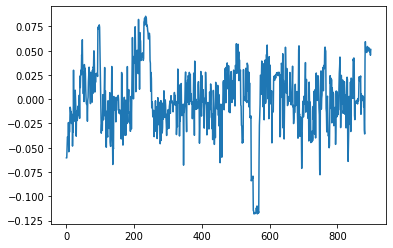

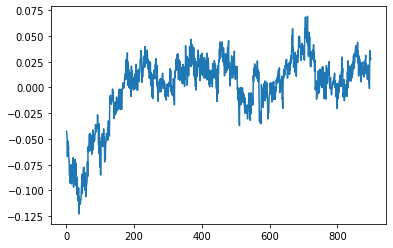

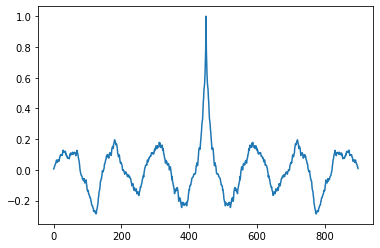

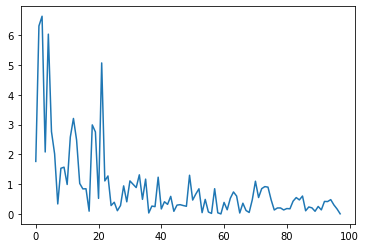

6.634060460103012 5.068824704460543
waiting


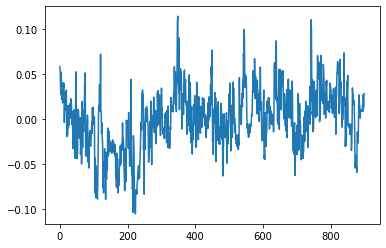

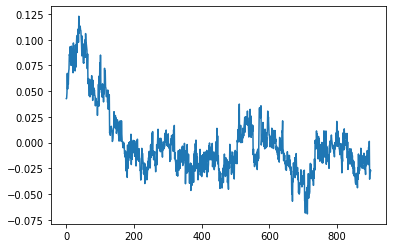

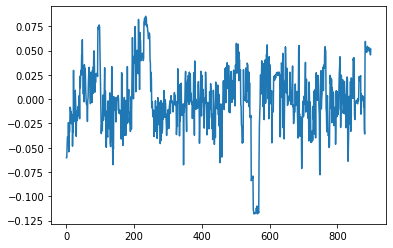

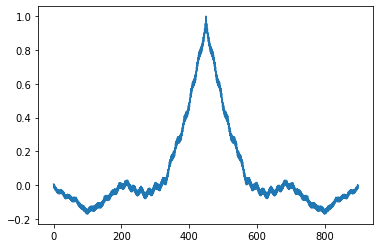

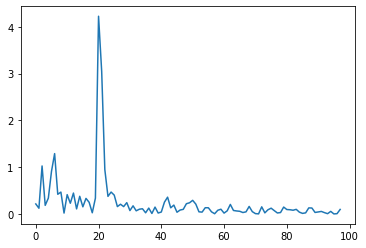

4.227602107228288 1.2899439833066155
estimated heartrate  84.0


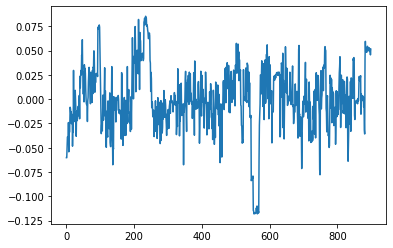

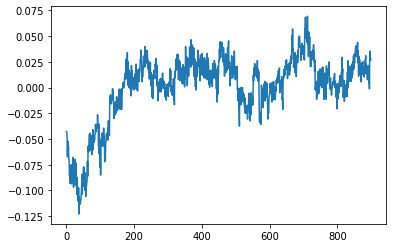

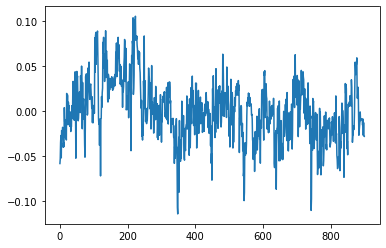

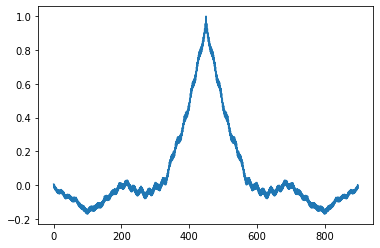

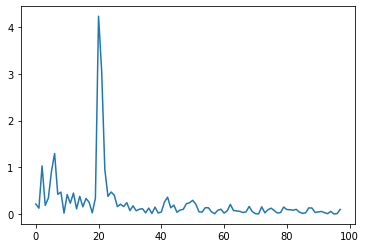

4.233145125249929 1.294247114701444
estimated heartrate  84.0


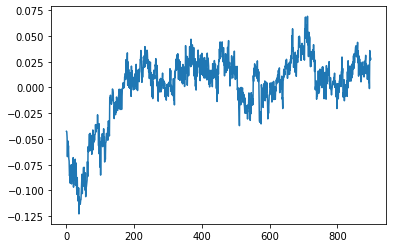

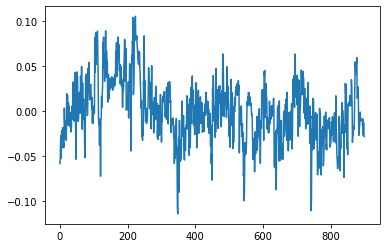

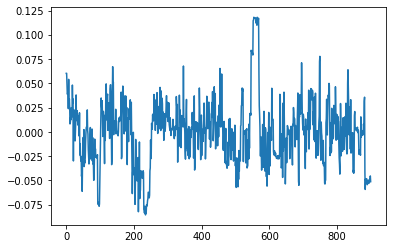

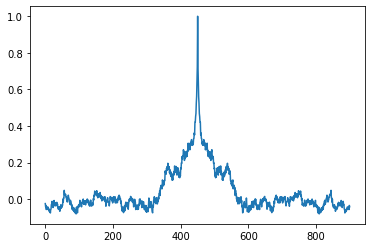

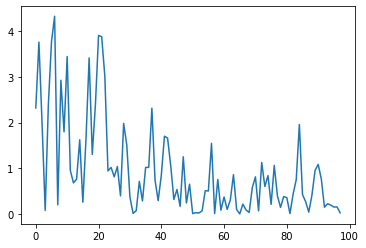

4.319101821823426 3.9004507231987366
waiting


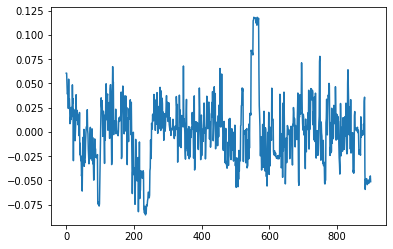

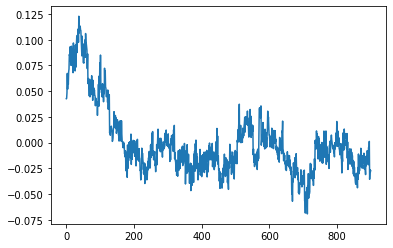

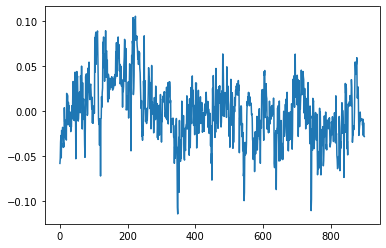

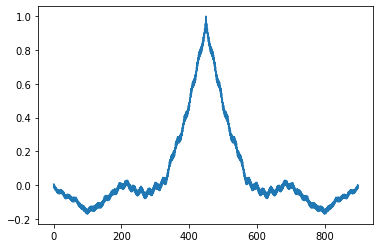

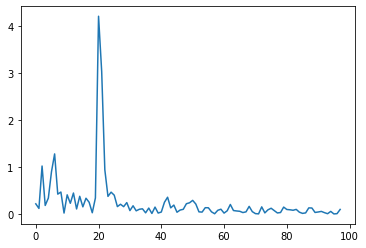

4.214423657371606 1.2797313098496719
estimated heartrate  84.0


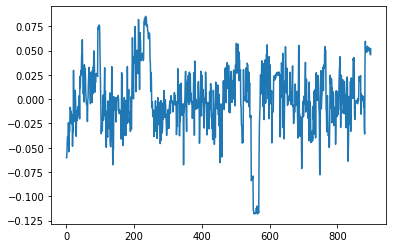

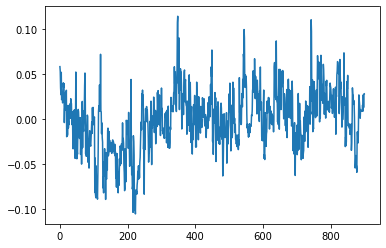

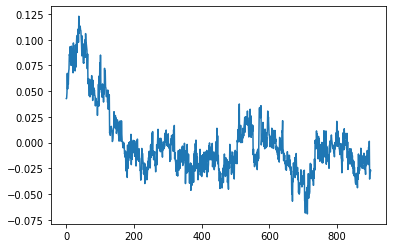

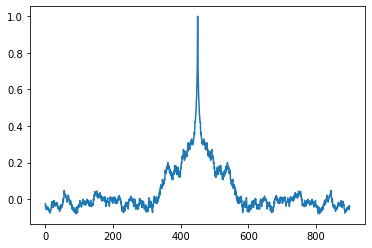

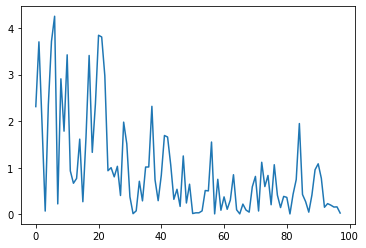

4.248988396957611 3.8414559669327804
waiting


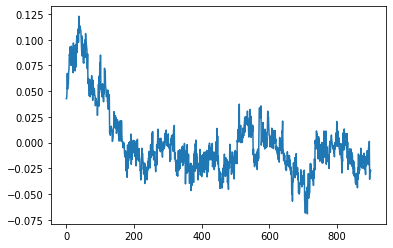

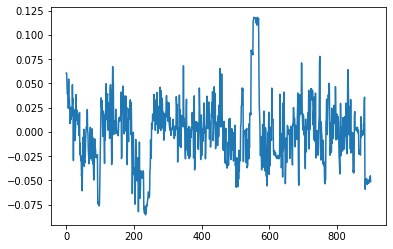

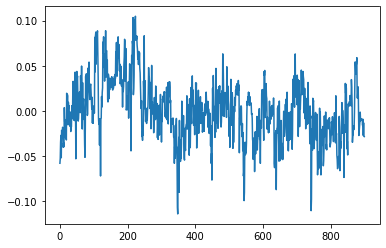

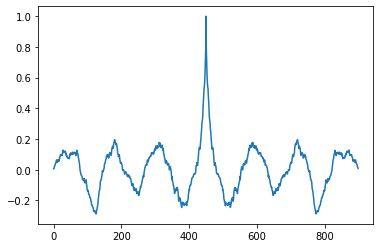

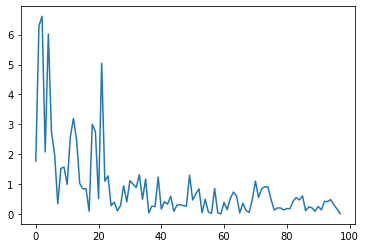

6.613496478327496 5.041685915148799
waiting


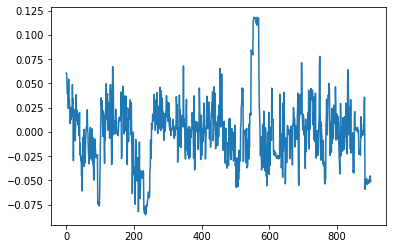

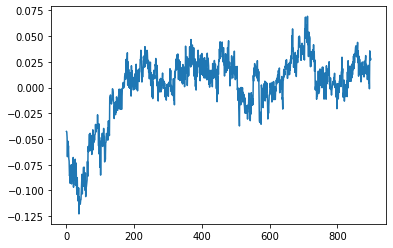

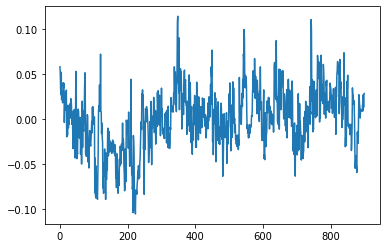

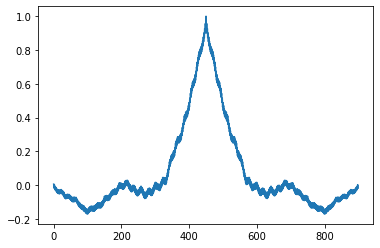

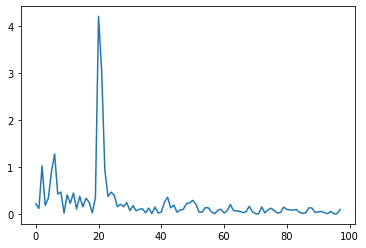

4.213568956519771 1.2790686773826676
estimated heartrate  84.0


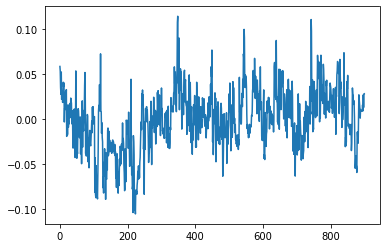

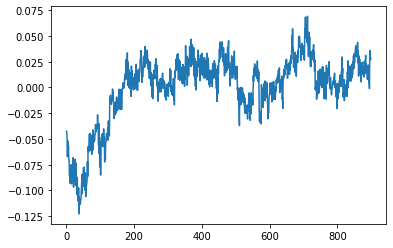

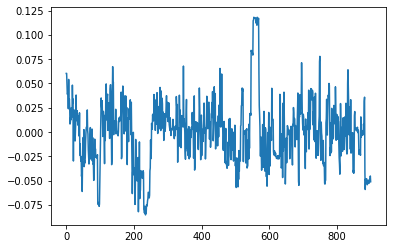

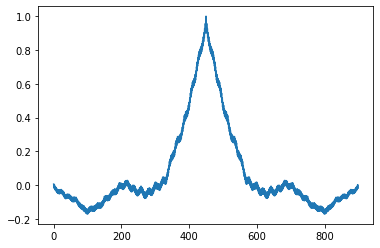

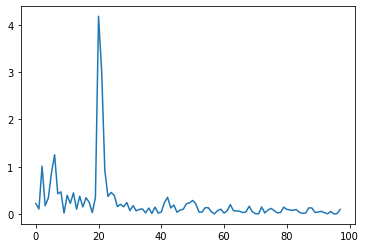

4.178676912592242 1.2522857624090244
estimated heartrate  84.0


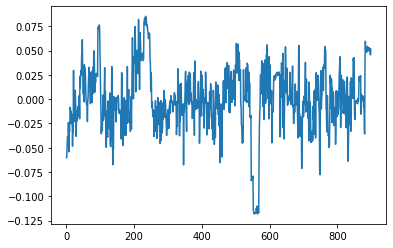

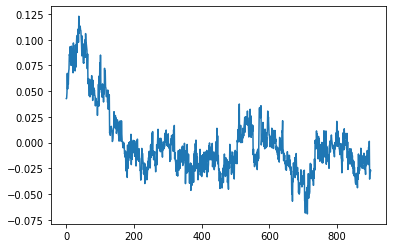

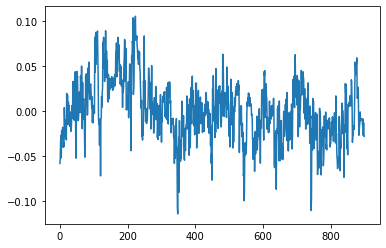

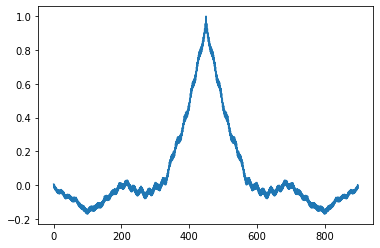

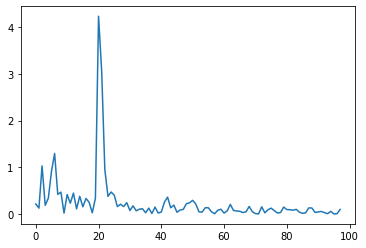

4.2342065017689325 1.2950715394957846
estimated heartrate  84.0


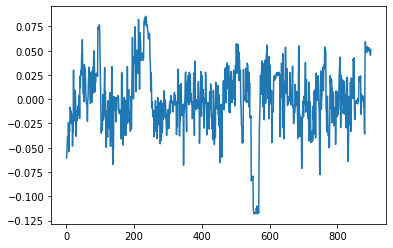

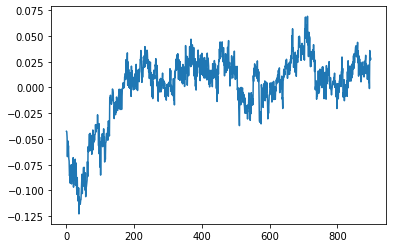

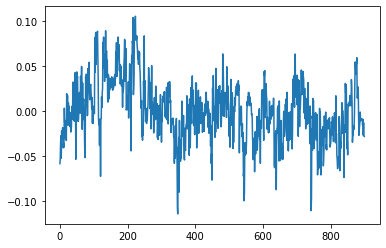

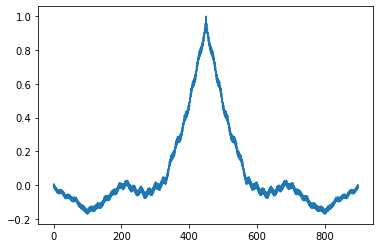

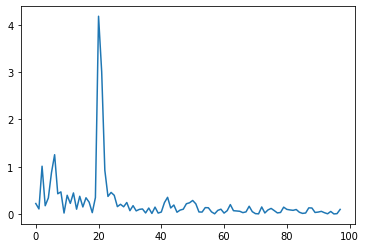

4.179821884322659 1.2531568958421044
estimated heartrate  84.0


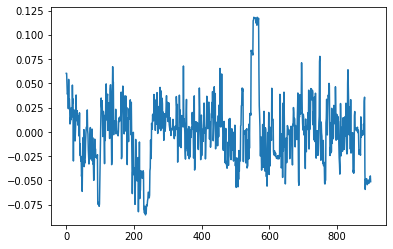

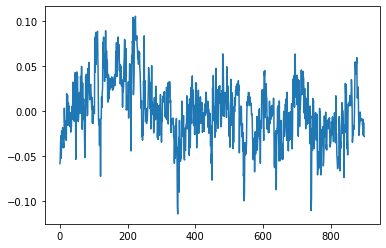

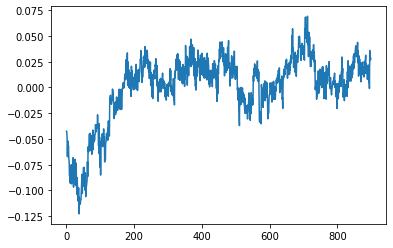

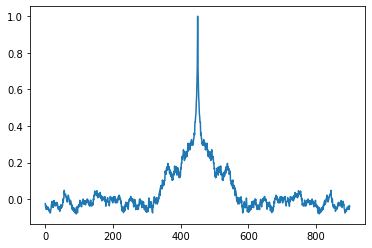

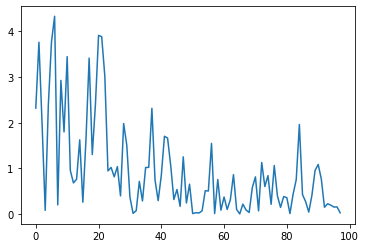

4.324387086510987 3.906181352083471
waiting


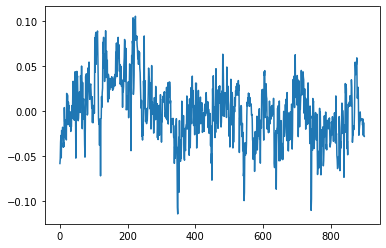

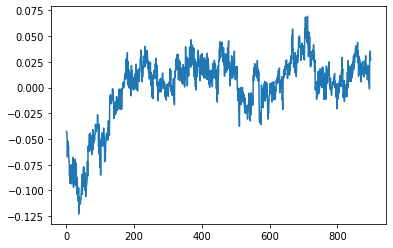

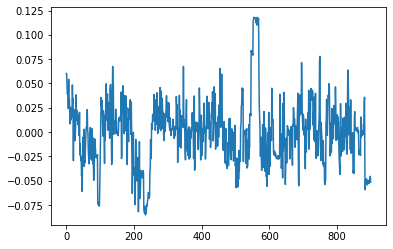

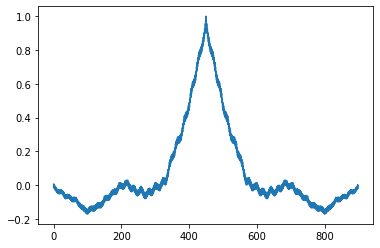

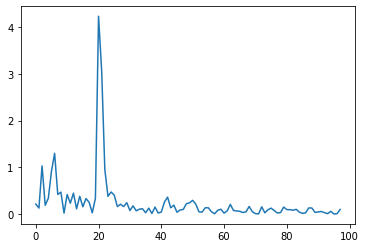

4.239182893587874 1.2989422876283214
estimated heartrate  84.0


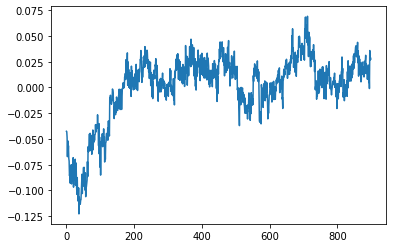

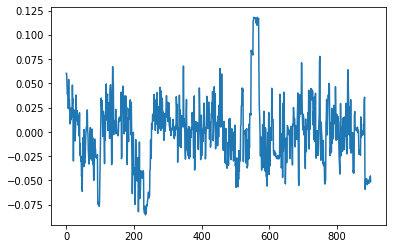

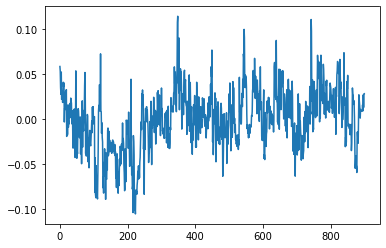

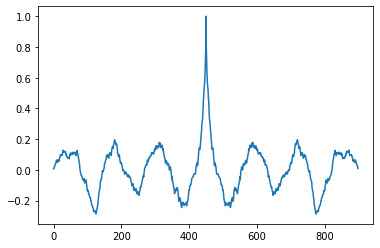

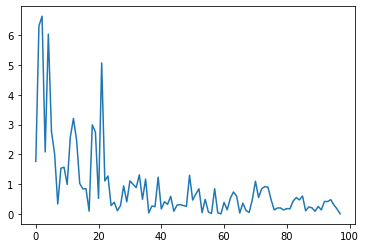

6.633555465949603 5.068461895345716
waiting


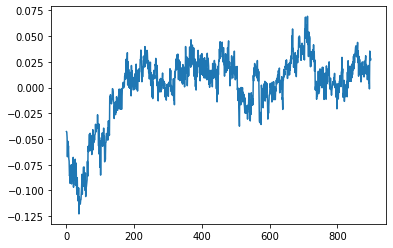

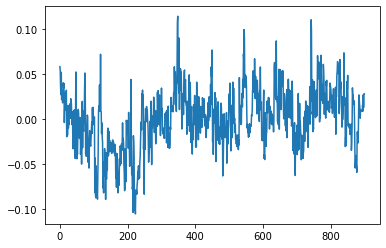

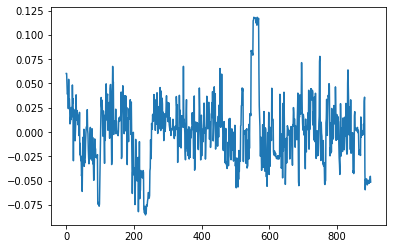

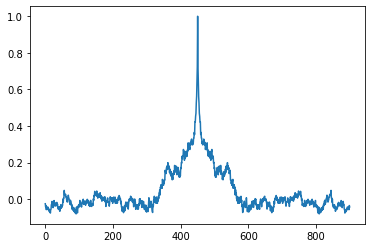

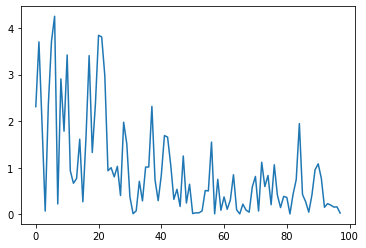

4.252696308440628 3.844126523095098
waiting


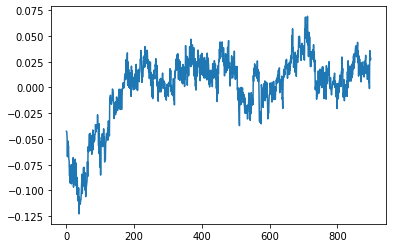

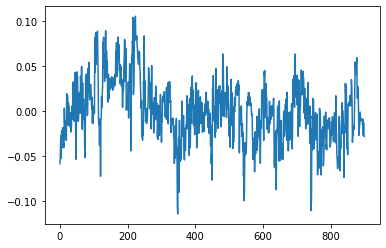

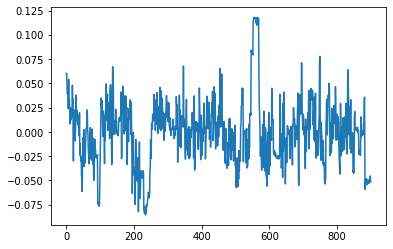

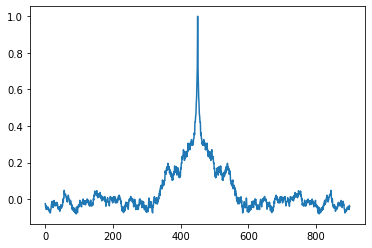

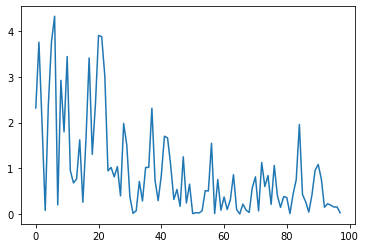

4.319014589767518 3.9014468456513547
waiting


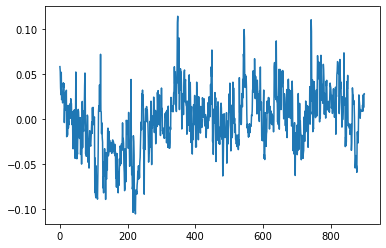

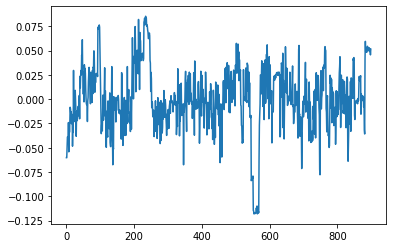

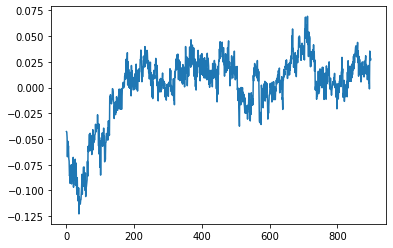

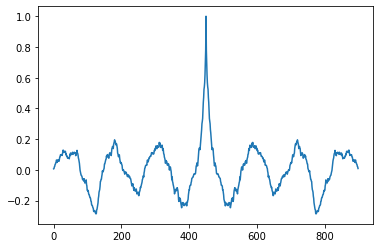

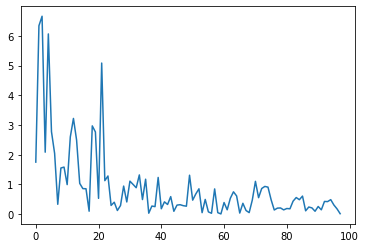

6.663343201407953 5.086891696972561
waiting


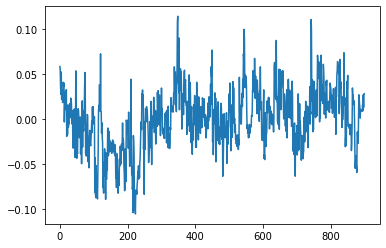

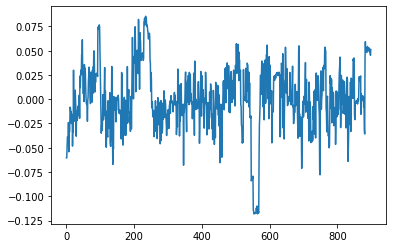

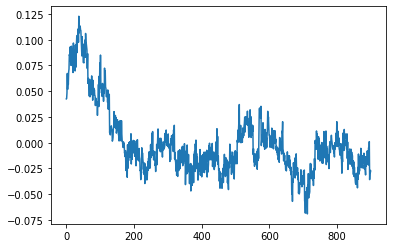

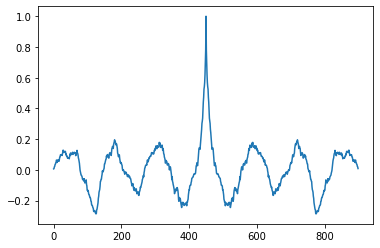

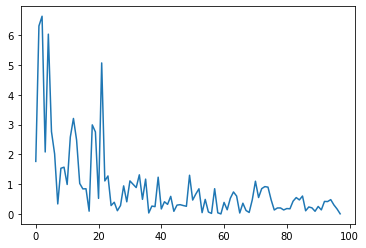

6.63333911850969 5.068356916247299
waiting


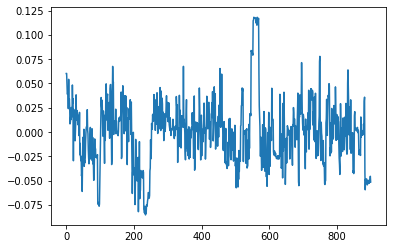

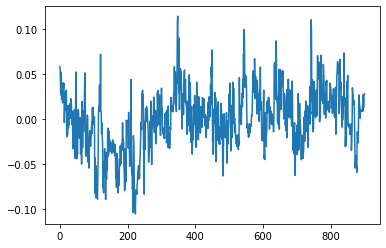

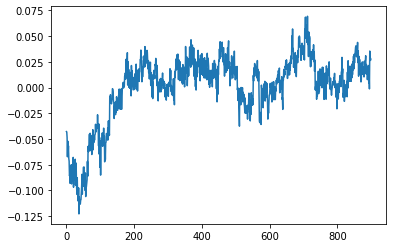

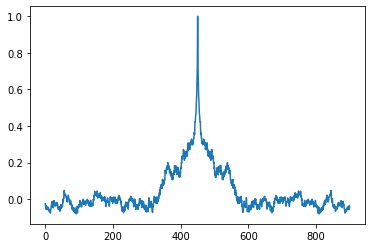

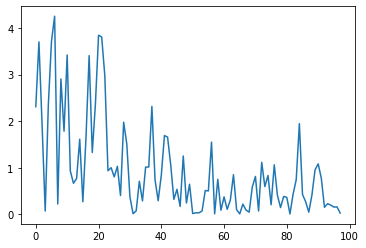

4.253415777564282 3.8452565235376652
waiting


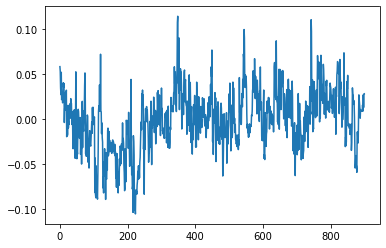

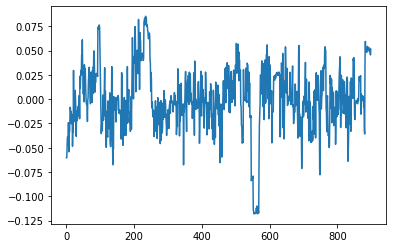

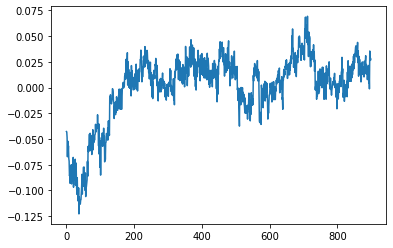

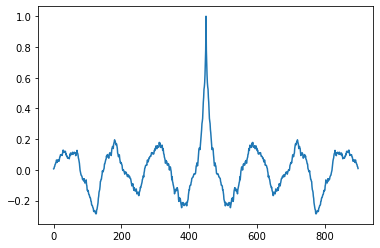

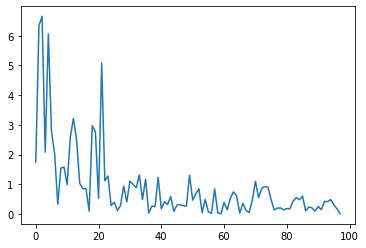

6.656669782715759 5.081603135133559
waiting


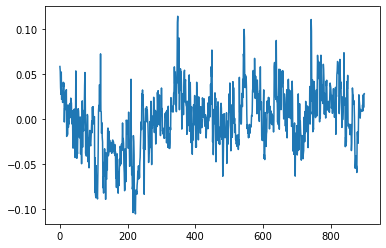

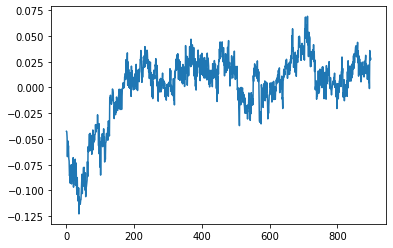

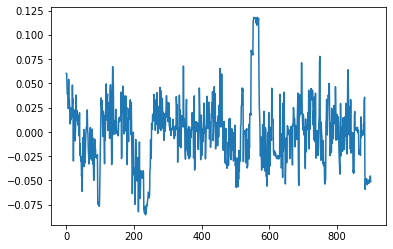

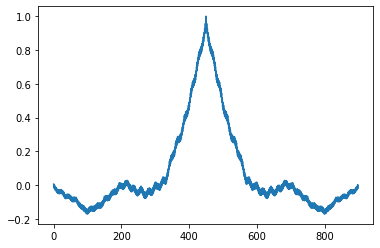

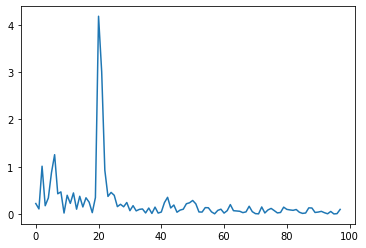

4.180641994383359 1.2537837598946655
estimated heartrate  84.0


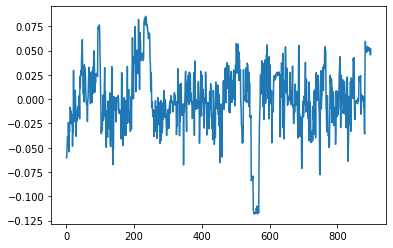

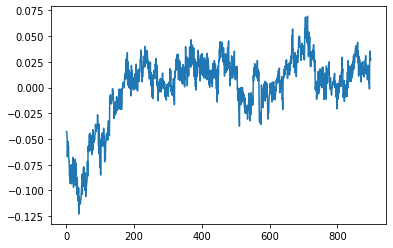

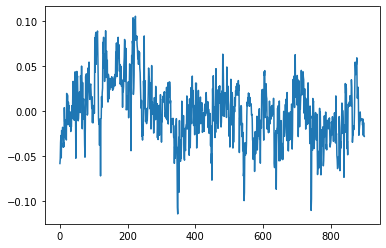

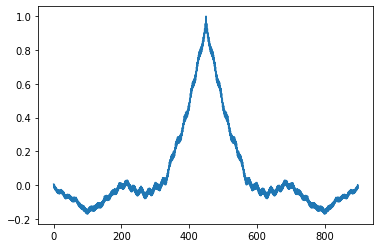

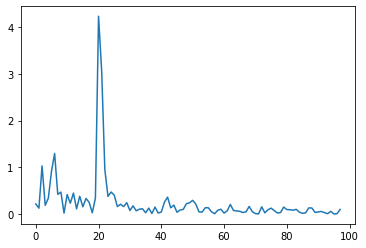

4.232388926575716 1.2936587867546536
estimated heartrate  84.0


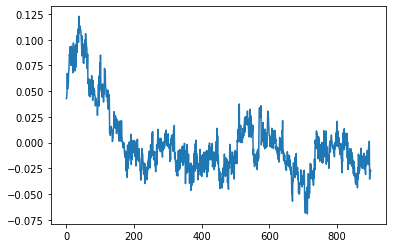

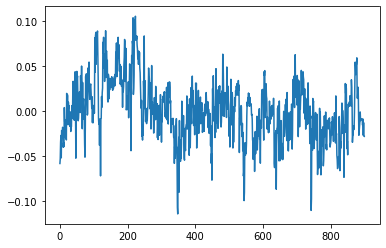

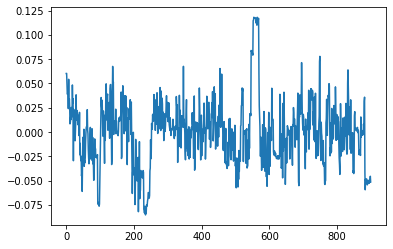

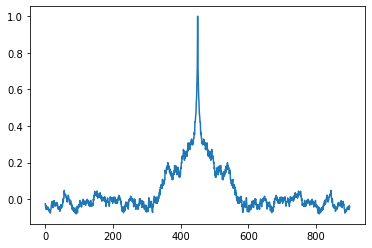

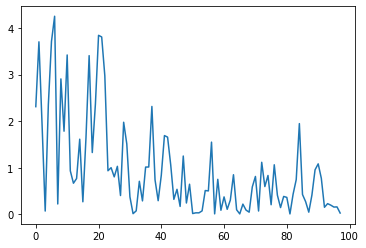

4.253312029793191 3.843988655971818
waiting


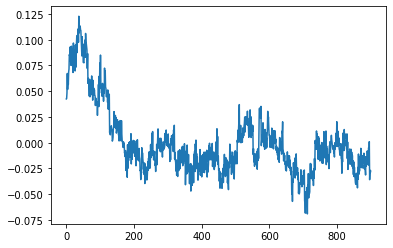

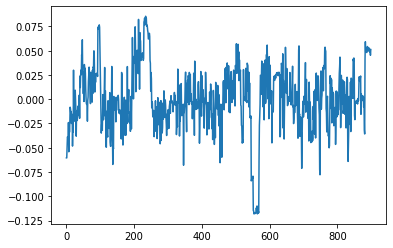

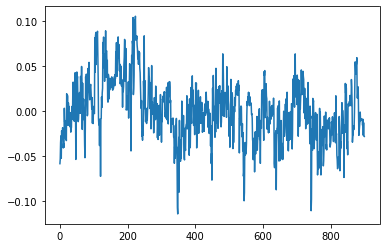

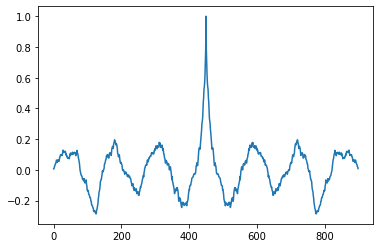

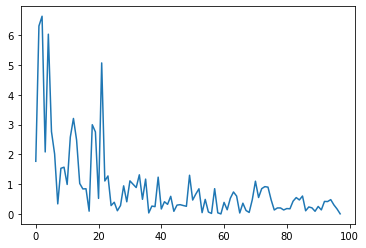

6.628805372930863 5.0651977082790545
waiting


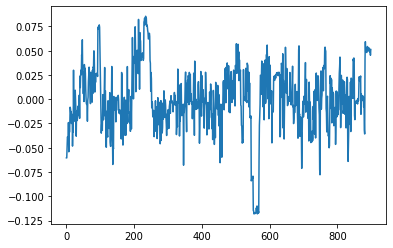

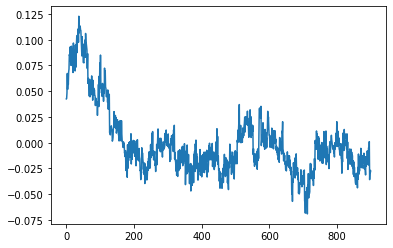

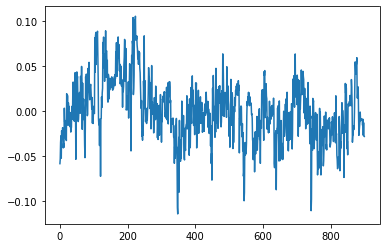

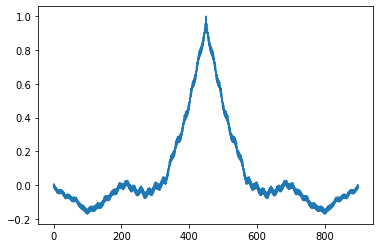

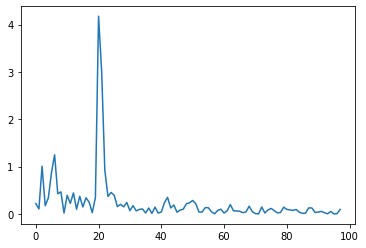

4.176618143301189 1.2507089522360557
estimated heartrate  84.0


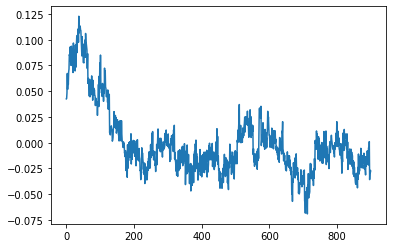

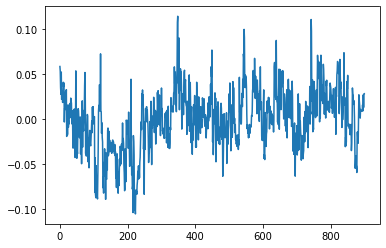

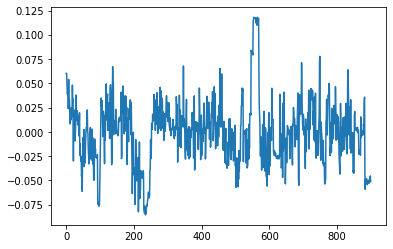

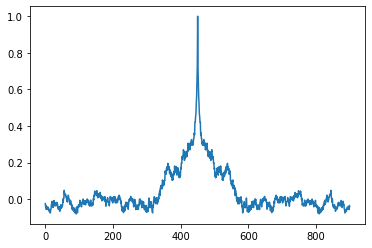

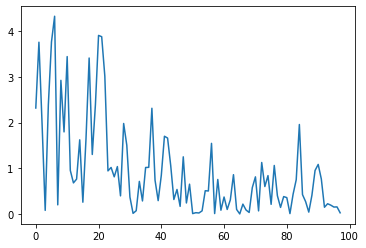

4.321717728547147 3.903520279283387
waiting


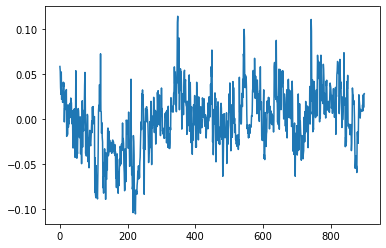

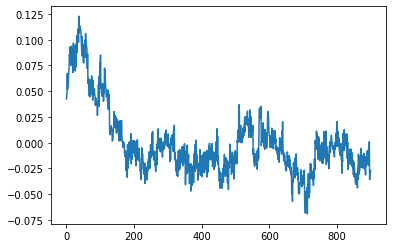

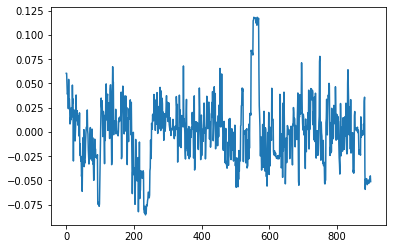

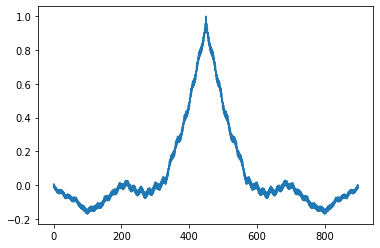

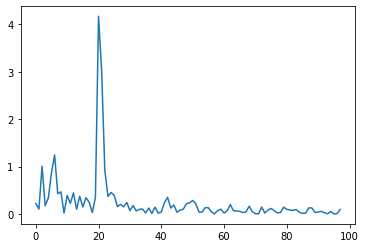

4.171368897930009 1.2467053755676512
estimated heartrate  84.0


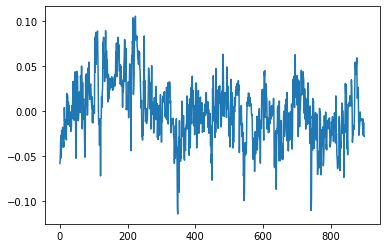

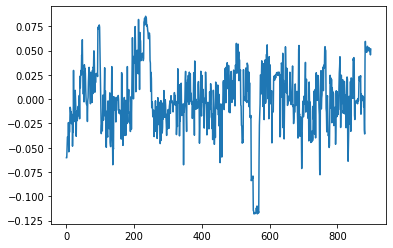

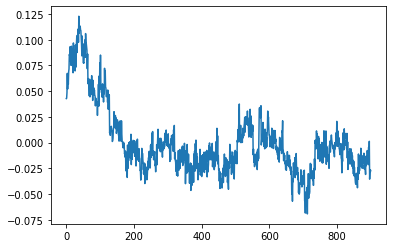

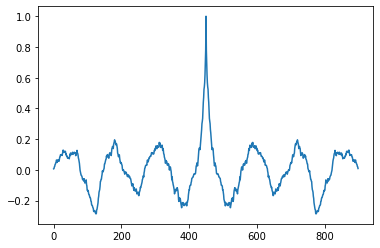

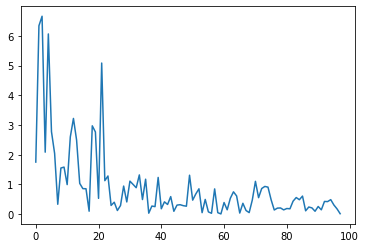

6.6615032759699915 5.085799682162889
waiting


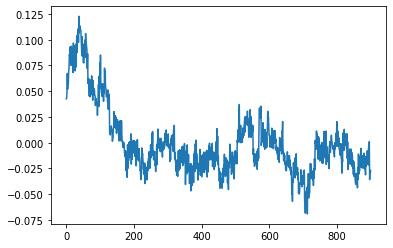

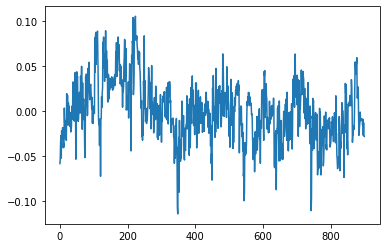

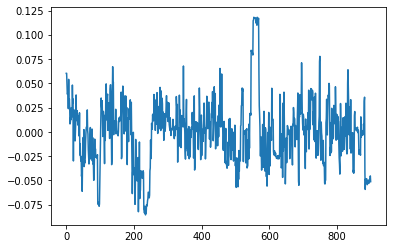

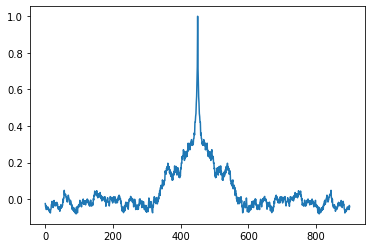

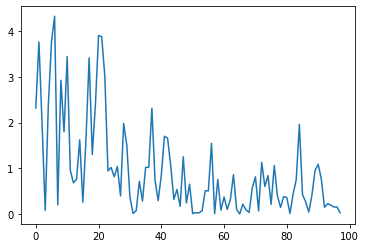

4.3184723961347515 3.897939816505076
waiting


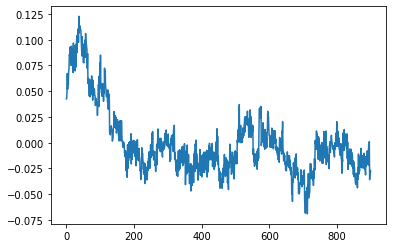

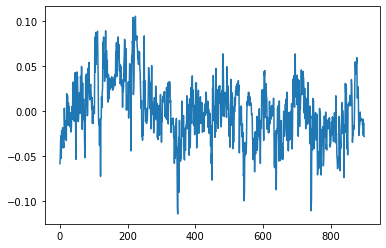

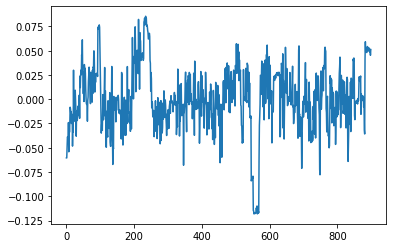

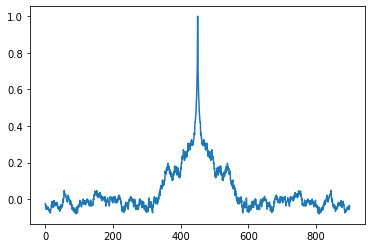

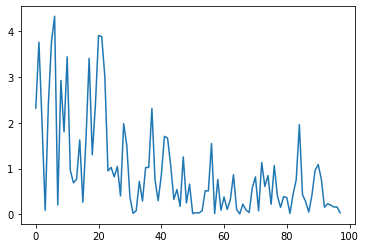

4.329722336979142 3.9090706886620197
waiting


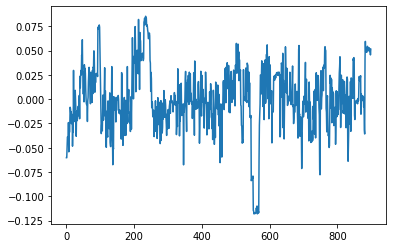

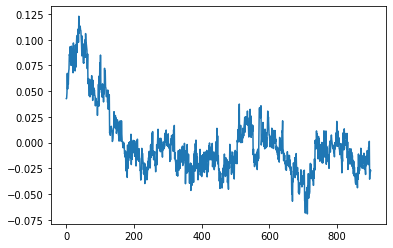

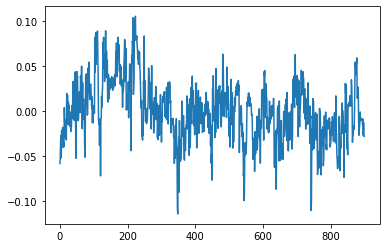

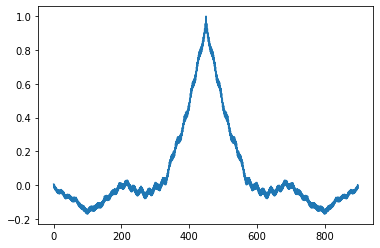

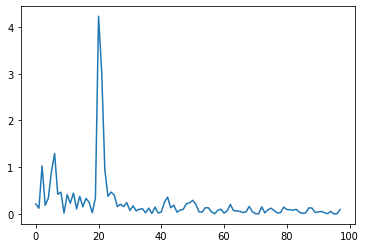

4.2289465152177925 1.2909865234956348
estimated heartrate  84.0


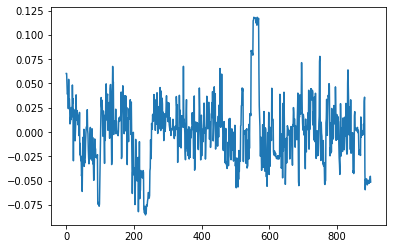

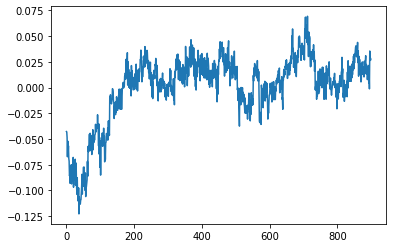

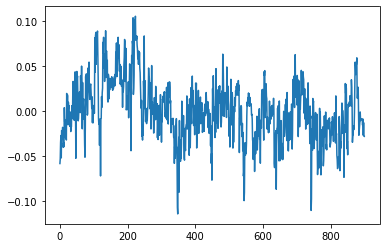

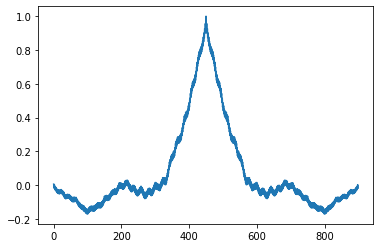

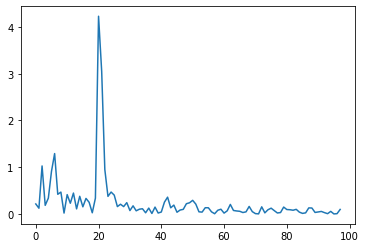

4.229243547085194 1.2912171339601486
estimated heartrate  84.0


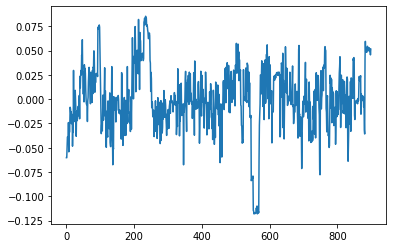

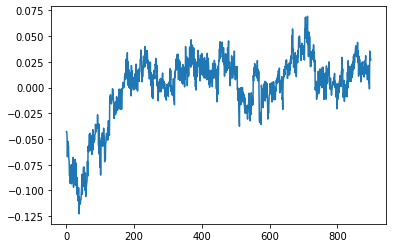

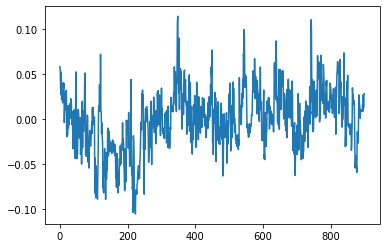

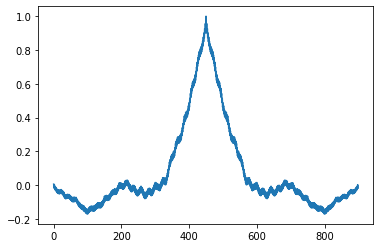

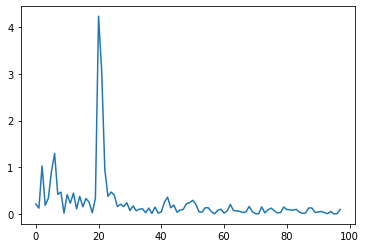

4.233959643991281 1.294879735060768
estimated heartrate  84.0


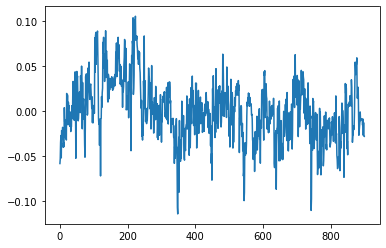

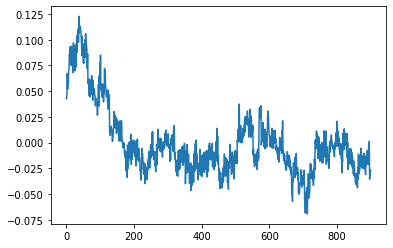

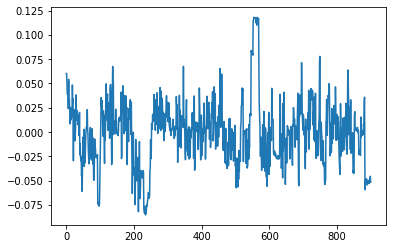

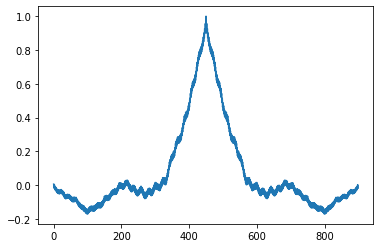

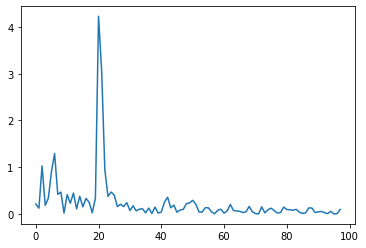

4.229791732012199 1.2916428490351042
estimated heartrate  84.0


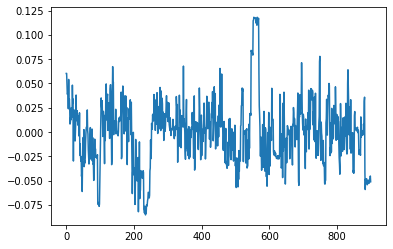

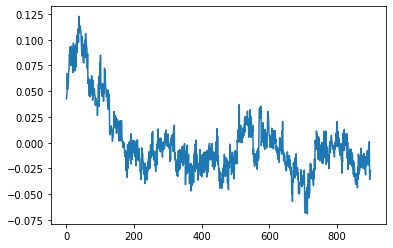

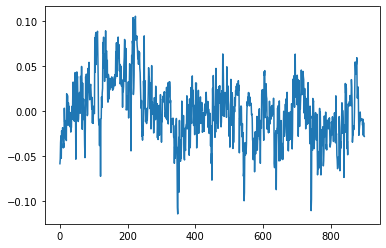

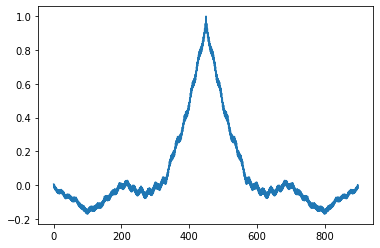

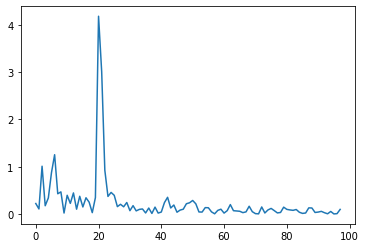

4.179291104324855 1.2527564796494435
estimated heartrate  84.0


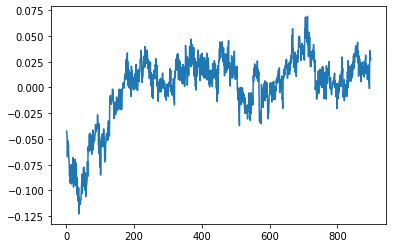

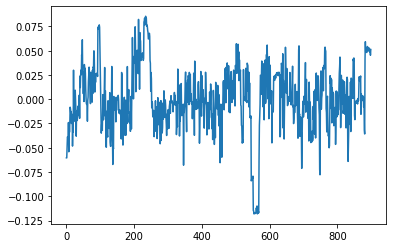

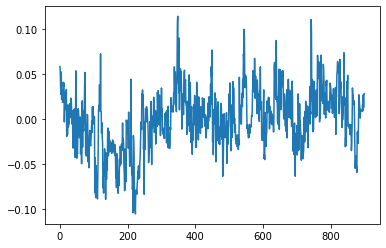

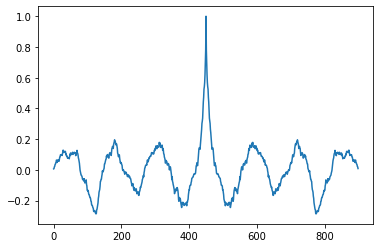

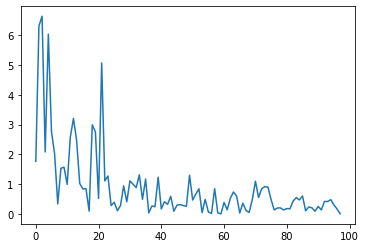

6.631677930211086 5.067199279142059
waiting


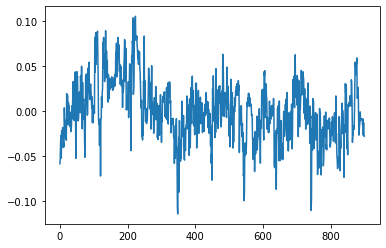

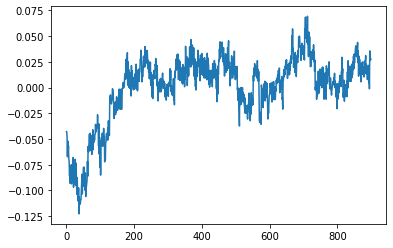

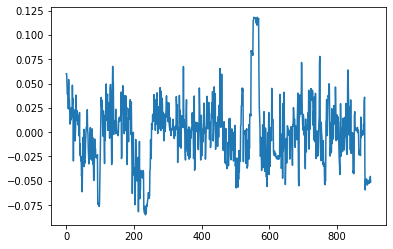

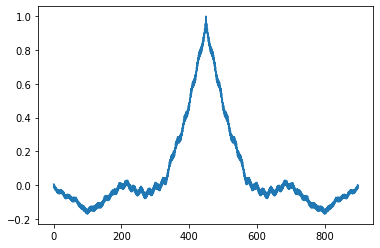

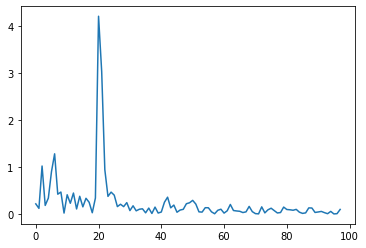

4.218837520657192 1.2831626722703986
estimated heartrate  84.0


In [187]:
#normalize over 30s windows as in Poe et al.
n30 = int((n_frames - 900)/30) #number of 30 second sliding windows
ran = np.zeros(900)
gan = np.zeros(900)
ban = np.zeros(900)
for i in range(n30):
  rav = np.mean(ra[i*30:i*30+900])
  gav = np.mean(ga[i*30:i*30+900])
  bav = np.mean(ba[i*30:i*30+900])
  rstd = np.std(ra[i*30:i*30+900])
  gstd = np.std(ga[i*30:i*30+900])
  bstd = np.std(ba[i*30:i*30+900])
  for j in range(900):
    ran[j] = (ra[j] - rav)/rstd
    gan[j] = (ga[j] - gav)/gstd
    ban[j] = (ba[j] - bav)/bstd
  X = np.array(list(zip(ran,gan,ban)))
  X_transformed = transformer.fit_transform(X)
  X_indep = X_transformed.transpose()
  plt.plot(X_indep[0])
  plt.show()
  plt.plot(X_indep[1])
  plt.show()
  plt.plot(X_indep[2])
  plt.show()
  x1 = X_indep[1]
  x1_corr = signal.correlate(x1, x1, mode='same')
  plt.plot(x1_corr)
  plt.show()
  ff = np.fft.hfft(x1_corr[:int(len(x1_corr)/2)])
  fs_n = 30/len(x1_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 10], ff[hr1 + 10:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.5*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate ", hr1)
  else:
    print("waiting")



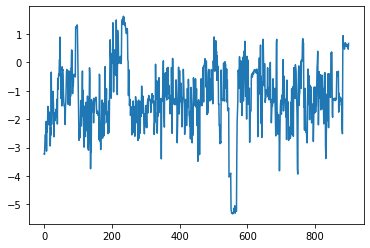

In [178]:
plt.plot(ran)

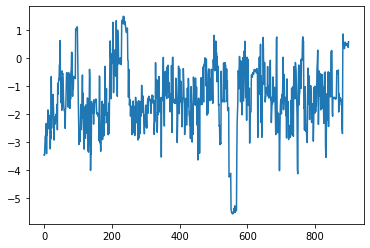

In [179]:
plt.plot(gan)

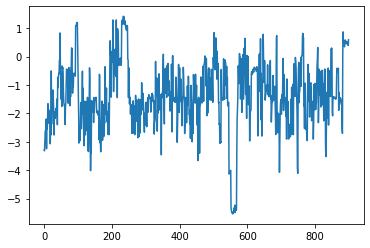

In [180]:
plt.plot(ban)